In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [3]:
lda_10_matrix = np.load('../../processed_files/lda_10_matrix.npy')
lda_25_matrix = np.load('../../processed_files/lda_25_matrix.npy')
lda_50_matrix = np.load('../../processed_files/lda_50_matrix.npy')
df_merged = pickle.load(open("../../processed_files/df_merged.pickle", "rb"))

In [5]:
lda_10_matrix.shape

(12956, 20)

In [4]:
lda_25_matrix.shape

(12968, 20)

In [5]:
lda_50_matrix.shape

(12968, 20)

In [6]:
df_merged.head()

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED
0,0-my.com,0-my.com related searches: related searches:,"[mycom, related, searches, related, searches]","[0, -, m, y, ., c, o, m, , r, e, l, a, t, e, ..."
1,00bitz.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ..."
2,01187.com,01187.com is available for purchase! - wwwv1.c...,"[com, vailable, purchase, wwwvcom, welcome, uu...","[0, 1, 1, 8, 7, ., c, o, m, , i, s, , a, v, ..."
3,027.ir,"027.ir - dns4.ir 027.ir hits: 7,267 under cons...","[ir, dnsir, ir, hits, construction, coming, so...","[0, 2, 7, ., i, r, , -, , d, n, s, 4, ., i, ..."
4,03h.org,february | 2014 | online marketing review sear...,"[february, online, marketing, review, search, ...","[f, e, b, r, u, a, r, y, , |, , 2, 0, 1, 4, ..."


In [7]:
df_merged.shape

(12975, 4)

In [8]:
type(lda_10_matrix[0])

numpy.ndarray

In [9]:
type(lda_10_matrix[0])

numpy.ndarray

In [10]:
type(lda_10_matrix[0])

numpy.ndarray

In [11]:
np.average(lda_10_matrix[[0, 1, 2]], axis=0)

array([0.10928263, 0.06947845, 0.04363364, 0.        , 0.        ,
       0.03136945, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03929112, 0.        , 0.59718822,
       0.        , 0.        , 0.10975649, 0.        , 0.        ])

## DB Scan

In [12]:
from sklearn.cluster import DBSCAN

In [29]:
# eps (default 0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples (default 5): number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
# algorithm (default 'auto'): ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
lda_10_dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(lda_10_matrix)
lda_25_dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(lda_25_matrix)
lda_50_dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(lda_50_matrix)

In [14]:
lda_10_dbscan.labels_

array([ 0,  0, -1, ...,  4, -1, -1])

In [30]:
lda_25_dbscan.labels_

array([ 0,  0, -1, ..., 32, -1, -1])

In [31]:
lda_50_dbscan.labels_

array([ 0,  0, -1, ...,  7, -1, -1])

In [32]:
lda_10_num_clusters = max(lda_10_dbscan.labels_)
lda_25_num_clusters = max(lda_25_dbscan.labels_)
lda_50_num_clusters = max(lda_50_dbscan.labels_)

125

In [33]:
lda_10_num_clusters

125

In [34]:
lda_25_num_clusters

92

In [35]:
lda_50_num_clusters

130

In [36]:
lda_10_index_cluster = zip(range(len(lda_10_dbscan.labels_)), lda_10_dbscan.labels_)
lda_10_index_cluster_dict = dict(lda_10_index_cluster)
lda_25_index_cluster = zip(range(len(lda_25_dbscan.labels_)), lda_25_dbscan.labels_)
lda_25_index_cluster_dict = dict(lda_25_index_cluster)
lda_50_index_cluster = zip(range(len(lda_50_dbscan.labels_)), lda_50_dbscan.labels_)
lda_50_index_cluster_dict = dict(lda_50_index_cluster)

In [37]:
lda_10_index_cluster_dict[456]

-1

In [38]:
lda_25_index_cluster_dict[456]

-1

In [39]:
lda_50_index_cluster_dict[456]

-1

In [40]:
lda_10_cluster_index = list(zip(lda_10_dbscan.labels_, range(len(lda_10_dbscan.labels_))))
lda_25_cluster_index = list(zip(lda_25_dbscan.labels_, range(len(lda_25_dbscan.labels_))))
lda_50_cluster_index = list(zip(lda_50_dbscan.labels_, range(len(lda_50_dbscan.labels_))))

In [43]:
lda_10_cluster_list = dict()
for i in range(lda_10_num_clusters):
    lda_10_cluster_list[i] = list(filter(lambda row: row[0] == i, lda_10_cluster_index))
lda_25_cluster_list = dict()
for i in range(lda_25_num_clusters):
    lda_25_cluster_list[i] = list(filter(lambda row: row[0] == i, lda_25_cluster_index))
lda_50_cluster_list = dict()
for i in range(lda_50_num_clusters):
    lda_50_cluster_list[i] = list(filter(lambda row: row[0] == i, lda_50_cluster_index))

In [44]:
for i in range(lda_10_num_clusters):
    print('cluster: ', i, 'size: ', len(lda_10_cluster_list[i]))

cluster:  0 size:  841
cluster:  1 size:  41
cluster:  2 size:  333
cluster:  3 size:  9
cluster:  4 size:  587
cluster:  5 size:  2549
cluster:  6 size:  5
cluster:  7 size:  26
cluster:  8 size:  140
cluster:  9 size:  9
cluster:  10 size:  35
cluster:  11 size:  22
cluster:  12 size:  28
cluster:  13 size:  8
cluster:  14 size:  109
cluster:  15 size:  30
cluster:  16 size:  20
cluster:  17 size:  5
cluster:  18 size:  17
cluster:  19 size:  6
cluster:  20 size:  20
cluster:  21 size:  35
cluster:  22 size:  31
cluster:  23 size:  26
cluster:  24 size:  10
cluster:  25 size:  20
cluster:  26 size:  80
cluster:  27 size:  7
cluster:  28 size:  19
cluster:  29 size:  8
cluster:  30 size:  30
cluster:  31 size:  8
cluster:  32 size:  16
cluster:  33 size:  7
cluster:  34 size:  7
cluster:  35 size:  11
cluster:  36 size:  53
cluster:  37 size:  5
cluster:  38 size:  22
cluster:  39 size:  5
cluster:  40 size:  21
cluster:  41 size:  11
cluster:  42 size:  7
cluster:  43 size:  6
cluste

In [45]:
for i in range(lda_25_num_clusters):
    print('cluster: ', i, 'size: ', len(lda_25_cluster_list[i]))

cluster:  0 size:  3485
cluster:  1 size:  873
cluster:  2 size:  20
cluster:  3 size:  293
cluster:  4 size:  19
cluster:  5 size:  19
cluster:  6 size:  19
cluster:  7 size:  16
cluster:  8 size:  5
cluster:  9 size:  44
cluster:  10 size:  22
cluster:  11 size:  96
cluster:  12 size:  5
cluster:  13 size:  54
cluster:  14 size:  26
cluster:  15 size:  136
cluster:  16 size:  104
cluster:  17 size:  113
cluster:  18 size:  75
cluster:  19 size:  9
cluster:  20 size:  5
cluster:  21 size:  5
cluster:  22 size:  20
cluster:  23 size:  8
cluster:  24 size:  5
cluster:  25 size:  34
cluster:  26 size:  5
cluster:  27 size:  14
cluster:  28 size:  12
cluster:  29 size:  6
cluster:  30 size:  12
cluster:  31 size:  22
cluster:  32 size:  64
cluster:  33 size:  15
cluster:  34 size:  8
cluster:  35 size:  5
cluster:  36 size:  12
cluster:  37 size:  14
cluster:  38 size:  21
cluster:  39 size:  14
cluster:  40 size:  8
cluster:  41 size:  6
cluster:  42 size:  9
cluster:  43 size:  3
cluste

In [46]:
for i in range(lda_50_num_clusters):
    print('cluster: ', i, 'size: ', len(lda_50_cluster_list[i]))

cluster:  0 size:  1278
cluster:  1 size:  546
cluster:  2 size:  55
cluster:  3 size:  2904
cluster:  4 size:  133
cluster:  5 size:  11
cluster:  6 size:  12
cluster:  7 size:  108
cluster:  8 size:  6
cluster:  9 size:  25
cluster:  10 size:  79
cluster:  11 size:  7
cluster:  12 size:  16
cluster:  13 size:  47
cluster:  14 size:  141
cluster:  15 size:  5
cluster:  16 size:  19
cluster:  17 size:  14
cluster:  18 size:  16
cluster:  19 size:  20
cluster:  20 size:  88
cluster:  21 size:  6
cluster:  22 size:  12
cluster:  23 size:  7
cluster:  24 size:  43
cluster:  25 size:  5
cluster:  26 size:  7
cluster:  27 size:  6
cluster:  28 size:  25
cluster:  29 size:  30
cluster:  30 size:  10
cluster:  31 size:  6
cluster:  32 size:  23
cluster:  33 size:  10
cluster:  34 size:  30
cluster:  35 size:  19
cluster:  36 size:  8
cluster:  37 size:  11
cluster:  38 size:  8
cluster:  39 size:  26
cluster:  40 size:  13
cluster:  41 size:  19
cluster:  42 size:  27
cluster:  43 size:  6
cl

In [47]:
#len(cluster_list[0])

In [48]:
#len(cluster_list[1])

In [49]:
#len(cluster_list[2])

In [50]:
#len(cluster_list[num_clusters-1])

In [51]:
#cluster_list[1]

In [52]:
#[i[1] for i in cluster_list[0]]

In [60]:
import statistics

# index is cluster index
def lda_10_intracluster_similarity(index):
    cluster_centroid = np.average(lda_10_matrix[[i[1] for i in lda_10_cluster_list[index]]], axis=0)
    dist_list = []
    cluster = lda_10_cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-lda_10_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

# index is cluster index
def lda_25_intracluster_similarity(index):
    cluster_centroid = np.average(lda_25_matrix[[i[1] for i in lda_25_cluster_list[index]]], axis=0)
    dist_list = []
    cluster = lda_25_cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-lda_25_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

# index is cluster index
def lda_50_intracluster_similarity(index):
    cluster_centroid = np.average(lda_50_matrix[[i[1] for i in lda_50_cluster_list[index]]], axis=0)
    dist_list = []
    cluster = lda_50_cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-lda_50_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [61]:
lda_10_intracluster_similarity(0)

(0.09176413210654283, 0.004871668467603175)

In [62]:
lda_25_intracluster_similarity(0)

(0.696301326157678, 0.02126365023842078)

In [63]:
lda_50_intracluster_similarity(0)

(0.13135583190463387, 0.008043128240471153)

In [64]:
# index is cluster / cluster id
def generate_raw_content_cluster_10_df(index):
    index_list = lda_10_cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

def generate_raw_content_cluster_25_df(index):
    index_list = lda_25_cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

def generate_raw_content_cluster_50_df(index):
    index_list = lda_50_cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [65]:
generate_raw_content_cluster_10_df(101)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
101,360pc.com,contact - 360pc » categories manufacturers inf...,"[contact, pc, », categories, manufacturers, in...","[c, o, n, t, a, c, t, , -, , 3, 6, 0, p, c, ...",101
6059,jetsytravels.com,"trip day 11 (sunday, may 10th): prague | jetsy...","[trip, day, sunday, may, th, prague, jetsytrav...","[t, r, i, p, , d, a, y, , 1, 1, , (, s, u, ...",101
7044,lthblock.info,test page for the nginx http server nginx test...,"[test, page, nginx, http, server, nginx, test,...","[t, e, s, t, , p, a, g, e, , f, o, r, , t, ...",101
7291,maryderbyblend.com,maryderbyblend.com this site is under construc...,"[maryderbyblendcom, site, construction, seeing...","[m, a, r, y, d, e, r, b, y, b, l, e, n, d, ., ...",101
10460,somethingaboutcoins.info,somethingaboutcoins.info this site is under co...,"[somethingaboutcoinsinfo, site, construction, ...","[s, o, m, e, t, h, i, n, g, a, b, o, u, t, c, ...",101
11669,tinderdating.com.au,tinder dating | tinder online dating site in a...,"[tinder, dating, tinder, online, dating, site,...","[t, i, n, d, e, r, , d, a, t, i, n, g, , |, ...",101
12531,whiteparkcattlesociety.ltd.uk,society rules and regulations - white park cat...,"[society, rules, regulations, white, park, cat...","[s, o, c, i, e, t, y, , r, u, l, e, s, , a, ...",101
12869,youasacook.com,fava beans | you as a cook recipes for daily b...,"[fava, beans, cook, recipes, daily, body, main...","[f, a, v, a, , b, e, a, n, s, , |, , y, o, ...",101


In [67]:
generate_raw_content_cluster_25_df(10)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
10,100coin.com,100coin.com 您正在访问的域名 (100coin.com) 可以合作或转让! th...,"[coincom, 您正在访问的域名, coincom, 可以合作或转让, domain, ...","[1, 0, 0, c, o, i, n, ., c, o, m, , 您, 正, 在, ...",10
317,adminlayer.com,home of appwire.net,"[home, ppwirenet]","[h, o, m, e, , o, f, , a, p, p, w, i, r, e, ...",10
1923,calhounlawfirm.com,trademark attorneys in arkansas for ip protect...,"[trademark, attorneys, rkansas, ip, protection...","[t, r, a, d, e, m, a, r, k, , a, t, t, o, r, ...",10
2309,christsavedthissinner.com,god – christ saved this sinner sharing about h...,"[god, –, christ, saved, sinner, sharing, chris...","[g, o, d, , –, , c, h, r, i, s, t, , s, a, ...",10
2854,cybion.com,home • monitoring the web and managing your on...,"[home, •, monitoring, web, managing, online, r...","[h, o, m, e, , •, , m, o, n, i, t, o, r, i, ...",10
3486,e2bakesbrooklyn.com,contact e2 | e2 bakes brooklyn sweets & sass f...,"[contact, e, e, bakes, brooklyn, sweets, sass,...","[c, o, n, t, a, c, t, , e, 2, , |, , e, 2, ...",10
3558,eddieljohnson.com,speaker and breakthrough expert | eddie l john...,"[speaker, breakthrough, expert, eddie, l, john...","[s, p, e, a, k, e, r, , a, n, d, , b, r, e, ...",10
3771,epointindia.com,"privacy policy – epointindia digital banking, ...","[privacy, policy, –, epointindia, digital, ban...","[p, r, i, v, a, c, y, , p, o, l, i, c, y, , ...",10
4338,forexfighters.info,forex fighters toggle navigation moneypolo i w...,"[forex, fighters, toggle, navigation, moneypol...","[f, o, r, e, x, , f, i, g, h, t, e, r, s, , ...",10
6421,kingfishingtools.com,about us - king fishing tools your basket your...,"[us, king, fishing, tools, basket, basket, emp...","[a, b, o, u, t, , u, s, , -, , k, i, n, g, ...",10


In [68]:
generate_raw_content_cluster_50_df(10)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
10,100coin.com,100coin.com 您正在访问的域名 (100coin.com) 可以合作或转让! th...,"[coincom, 您正在访问的域名, coincom, 可以合作或转让, domain, ...","[1, 0, 0, c, o, i, n, ., c, o, m, , 您, 正, 在, ...",10
124,3dprinteduniverse.com,3d printed universe – yves amu klein creations...,"[printed, universe, –, yves, amu, klein, creat...","[3, d, , p, r, i, n, t, e, d, , u, n, i, v, ...",10
265,acrossthecurve.com,across the curve » blog archive » breaking the...,"[across, curve, », blog, archive, », breaking,...","[a, c, r, o, s, s, , t, h, e, , c, u, r, v, ...",10
313,adiseres.com,65 – adi seres menu 65 post navigation leave a...,"[–, adi, seres, menu, post, navigation, enter,...","[6, 5, , –, , a, d, i, , s, e, r, e, s, , ...",10
322,adonainissi.com,judge – adonainissi sharing insights in yeshua...,"[judge, –, adonainissi, sharing, insights, yes...","[j, u, d, g, e, , –, , a, d, o, n, a, i, n, ...",10
327,adrianbrownphoto.co.uk,adrian brown lrps - warwickshire wedding photo...,"[adrian, brown, lrps, warwickshire, wedding, p...","[a, d, r, i, a, n, , b, r, o, w, n, , l, r, ...",10
393,ahigherqualitylife.com,ahigherqualitylife.com,[ahigherqualitylifecom],"[a, h, i, g, h, e, r, q, u, a, l, i, t, y, l, ...",10
797,appleineyes.com,oil painting wall art morden abstract painting...,"[oil, painting, wall, art, morden, abstract, p...","[o, i, l, , p, a, i, n, t, i, n, g, , w, a, ...",10
977,atidecrem.com,about atidecrem | the atidecrem life project a...,"[atidecrem, atidecrem, life, project, adventur...","[a, b, o, u, t, , a, t, i, d, e, c, r, e, m, ...",10
994,attending.io,open discussion on ethical investment — attend...,"[open, discussion, ethical, investment, —, att...","[o, p, e, n, , d, i, s, c, u, s, s, i, o, n, ...",10


In [69]:
lda_10_avg_list = []
lda_10_variance_list = []

for i in range(lda_10_num_clusters):
    avg, variance = lda_10_intracluster_similarity(i)
    lda_10_avg_list.append(avg)
    lda_10_variance_list.append(variance)
    #print()

lda_25_avg_list = []
lda_25_variance_list = []

for i in range(lda_25_num_clusters):
    avg, variance = lda_25_intracluster_similarity(i)
    lda_25_avg_list.append(avg)
    lda_25_variance_list.append(variance)
    #print()
    
lda_50_avg_list = []
lda_50_variance_list = []

for i in range(lda_50_num_clusters):
    avg, variance = lda_50_intracluster_similarity(i)
    lda_50_avg_list.append(avg)
    lda_50_variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x1b84352898>,
 <a list of 11 Text xticklabel objects>)

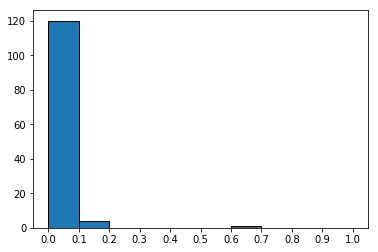

In [70]:
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(lda_10_avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

([<matplotlib.axis.XTick at 0x1b84dd6208>,
 <a list of 11 Text xticklabel objects>)

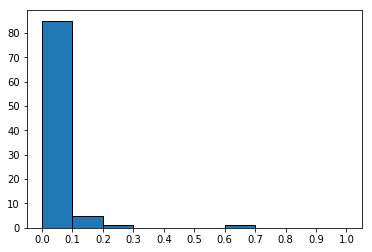

In [71]:
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(lda_25_avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

([<matplotlib.axis.XTick at 0x1b84e49908>,
 <a list of 11 Text xticklabel objects>)

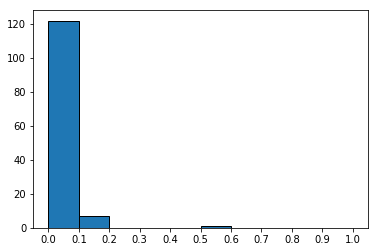

In [73]:
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(lda_50_avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [74]:
def lda_10_intercluster_dist():
    indices = range(lda_10_num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(lda_10_matrix[[x[1] for x in lda_10_cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(lda_10_matrix[[x[1] for x in lda_10_cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

def lda_25_intercluster_dist():
    indices = range(lda_25_num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(lda_25_matrix[[x[1] for x in lda_25_cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(lda_25_matrix[[x[1] for x in lda_25_cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

def lda_50_intercluster_dist():
    indices = range(lda_50_num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(lda_50_matrix[[x[1] for x in lda_50_cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(lda_50_matrix[[x[1] for x in lda_50_cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

In [75]:
intercluster_distances, values = lda_10_intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 0.9499742934498157


In [76]:
intercluster_distances, values = lda_25_intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 0.962638875374996


In [77]:
intercluster_distances, values = lda_50_intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 0.9359199734300826
